In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math

# Vectors

In [2]:
row_vec = np.array([4,2])
col_vec = np.array([ [-2], [3] ])

In [3]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# check out the sizes
print(np.shape(row_vec))
print(np.shape(col_vec))

(2,)
(2, 1)


C:\Users\evan\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


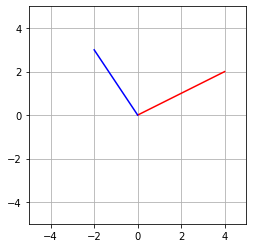

In [5]:
plt.plot([0,row_vec[0]],[0,row_vec[1]],'r',label='row vector')
plt.plot([0,col_vec[0]],[0,col_vec[1]],'b',label='column vector')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()
plt.show()

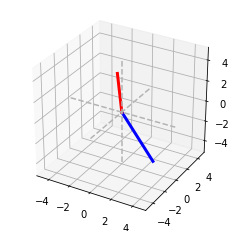

In [6]:
# import 3d plotting tools
from mpl_toolkits.mplot3d import Axes3D


v3_1 = np.array([3,0,-4])
v3_2 = np.array([-1,1,3])

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

# draw vectors
ax.plot([0,v3_1[0]],[0,v3_1[1]],[0,v3_1[2]],'b',linewidth=3)
ax.plot([0,v3_2[0]],[0,v3_2[1]],[0,v3_2[2]],'r',linewidth=3)

# guidelines
ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.show()

# Adding and scalar-multiplying vectors

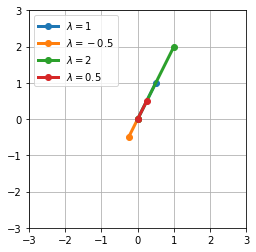

In [7]:
v = np.array([.5,1]) # vector
s = [1,-.5,2,.5] # scalars

for si in s:
    sv = si*v
    plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='$\\lambda=%g$' %(si))
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [8]:
# adding vectors
v1 = np.array([-1,2])
v2 = np.array([1,1])

v3a = v1+v2
v3b = np.add(v1,v2)

v3c = np.zeros(2)
for i in range(0,2):
    v3c[i] = v1[i] + v2[i]

print(v3a,v3b,v3c)

[0 3] [0 3] [0. 3.]


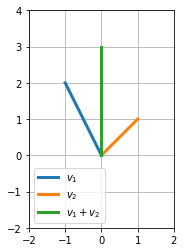

In [10]:
plt.plot([0,v1[0]],[0,v1[1]],label='$v_1$',linewidth=3)
plt.plot([0,v2[0]],[0,v2[1]],label='$v_2$',linewidth=3)
plt.plot([0,v3a[0]],[0,v3a[1]],label='$v_1+v_2$',linewidth=3)

plt.axis('square')
plt.legend()
plt.axis([-2,2,-2,4])
plt.grid()
plt.show()

<IPython.core.display.Math object>

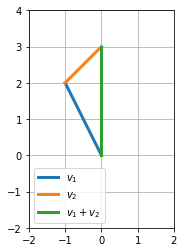

In [11]:
plt.plot([0,v1[0]],[0,v1[1]],label='$v_1$',linewidth=3)
plt.plot([0,v2[0]]+v1[0],[0,v2[1]]+v1[1],label='$v_2$',linewidth=3)
plt.plot([0,v3a[0]],[0,v3a[1]],label='$v_1+v_2$',linewidth=3)

str1 = sym.latex(sym.sympify(v1))
str2 = sym.latex(sym.sympify(v2))
str3 = sym.latex(sym.sympify(v3a))

display(Math('%s+%s=%s' %(str1,str2,str3)))

plt.axis('square')
plt.legend()
plt.axis([-2,2,-2,4])
plt.grid()
plt.show()

# The dot product

In [93]:
v = np.array([1,2,3])
w = np.array([2,2,3])
dp1 = 0

for i in range(0,len(v)):
    dp1 = dp1 + v[i]*w[i]

In [94]:
print(np.sum(dp1))
print(np.sum(np.multiply(v,w)))
print(np.sum(np.dot(v,w)))

15
15
15


In [21]:
# function that takes two vectors, tests whether the dot product is valid between them, 
# and returns the dot product or gives an error message

def mydotproduct(v,w):
    
    # squeeze out singleton dimensions
    v = np.squeeze(v)
    w = np.squeeze(w)
    
    # check whether they are the same size
    if len(v)!=len(w):
        raise ValueError('Vectors must have the same length!')
    
    display(Math('v^Tw = %s' %np.dot(v,w)))

In [22]:
v1 = np.random.randn(1,10)
v2 = np.random.randn(10,1)

# np.shape(np.squeeze(v2))

mydotproduct(v1,v2)

<IPython.core.display.Math object>

# Dot product application: Correlation coefficient

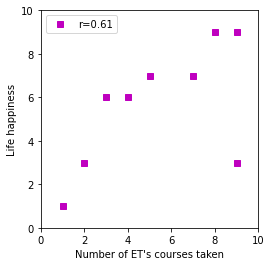

In [29]:
# data
ET_courses  = [4,5,8,2,9,9,1,3,7]
life_happiness = [6,7,9,3,9,3,1,6,7]

# mean-center
et = ET_courses - np.mean(ET_courses)
l = life_happiness - np.mean(life_happiness)

# compute correlation
numer = np.dot(et,l)
denom = np.sqrt( np.dot(et,et) ) * np.sqrt(np.dot(l,l))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(et,l)[1][0]

# show the data!
plt.plot(ET_courses,life_happiness,'ms',label='r=%s' %np.round(r1,2))

plt.axis([0,10,0,10])
plt.gca().set_aspect('equal')
plt.xlabel('Number of ET\'s courses taken')
plt.ylabel('Life happiness')
plt.legend()
plt.show()

# The outer product

In [102]:
v1 = np.random.randn(5)
v2 = np.random.randn(4)

# np.dot(v1,v2) # error; np.dot requires same dimmensions

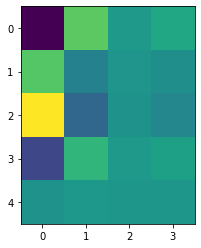

In [103]:
op = np.outer(v1,v2)
# display(Math(sym.latex(sym.sympify(op))))

plt.imshow(op)
plt.show()

In [105]:
display(Math(sym.latex(sym.sympify(op))))

<IPython.core.display.Math object>

In [35]:
v = np.arange(1,10)
w = np.arange(1,5)

print(np.outer(v,w))
print(np.outer(w,v))

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]
 [ 6 12 18 24]
 [ 7 14 21 28]
 [ 8 16 24 32]
 [ 9 18 27 36]]
[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]]


In [36]:
# show that svw=vsw=vws
s = 4

left = s*np.outer(v,w)
middle = np.outer(v*s,w)
right = np.outer(v,w)*s

print(left-middle)
print(middle-right)
print(left-right)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


# Matrix multiplication

In [53]:
A = np.random.randn(3,4)
B = np.random.randn(14,10)
C = np.random.randn(4,3)

# print(A@B)
print(A@C)
print(C@A)

[[ -1.07126934  -0.87584598  -0.11362483]
 [  0.95282586  -8.70827981 -13.54599248]
 [  1.00218199  -2.52650073  -2.90529338]]
[[-0.62566499  0.4764476   0.77592153  4.36472468]
 [ 0.07723128 -0.13493553  0.14663148  0.43189286]
 [-0.17618929  1.31337379 -2.12659414 -2.26549633]
 [ 2.61760688  0.40032486 -6.10599757 -9.79764787]]


In [54]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[-1, 1], [0, 1]])
A @ B

array([[-1,  3],
       [-3,  7]])

# Transposing matrices and vectors

In [58]:
# Trace is the addition of middle diagonal from top left to bottom right
A = np.array([[1, 7, 2], [3, 9, 4], [4, 6, 1]])
A

array([[1, 7, 2],
       [3, 9, 4],
       [4, 6, 1]])

In [59]:
A.trace()

11

In [63]:
A.transpose()

array([[1, 3, 4],
       [7, 9, 6],
       [2, 4, 1]])

In [60]:
r = np.random.randn(1,10)
c = np.random.randn(10,1)

print(np.shape(r))
print(np.shape(c))

(1, 10)
(10, 1)


In [61]:
r_flip1 = np.transpose(r)
r_flip2 = r.T
print(np.shape(r_flip2))

(10, 1)


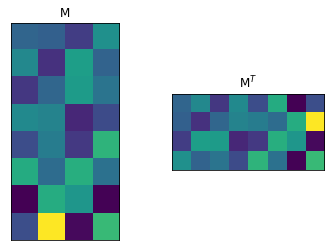

In [62]:
# matrix and image
mat = np.random.randn(8,4)
matT = mat.T

fig,ax = plt.subplots(1,2)
ax[0].imshow(mat)
ax[0].set_title('M')

ax[1].imshow(matT)
ax[1].set_title('M$^T$')

# set common properties
for i in ax:
    i.set_yticks([])
    i.set_xticks([])

plt.show()

# Various special matrices

In [107]:
# identity
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [66]:
# zeros
Z = np.zeros((5,5))
print(Z)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [67]:
# diagonal
D = np.diag([1,3,2,4,5])
print(D)
d = np.diagonal(D)
print(d)

[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
[1 3 2 4 5]


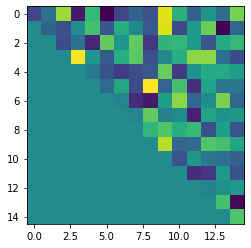

In [68]:
# triangular matrix
T = np.random.randn(15,15)

plt.imshow(np.triu(T))
plt.show()

In [71]:
# matrix of random integers
intmat = np.random.randint(-4,5,(4,4))
I4 = np.eye(4)
upper4 = np.triu(np.random.randn(4,4))

print(intmat.dtype)
print('\n\n')
print((intmat@I4).dtype)
print('\n\n')
print(intmat@upper4)

int32



float64



[[ -0.66109925   5.69892653   6.65517963  -0.06360894]
 [ -0.66109925   4.11645848   1.12930491  -1.00840307]
 [  1.98329775   6.64024121 -10.58647945  -0.22498448]
 [ -1.3221985   -7.59176358  12.3412505    1.43878579]]


[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


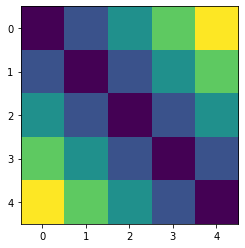

In [72]:
# figure out what a Toeplitz matrix is
from scipy.linalg import toeplitz

v = np.arange(1,6)
toe = toeplitz(v)

print(toe)

plt.imshow(toe)
plt.show()

# Matrix inverse

In [106]:
A= np.array([2,3,1,4]).reshape(2,2)
A

array([[2, 3],
       [1, 4]])

In [111]:
np.linalg.inv(A)

array([[ 0.8, -0.6],
       [-0.2,  0.4]])

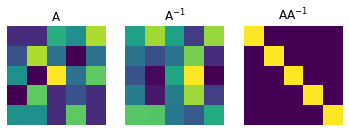

In [73]:
# random matrices are nearly always invertible

m = 5

A = np.random.randint(-5,6,(m,m))
Ainv = np.linalg.inv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{-1}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{-1}$')

for i in ax:
    i.axis('off')

plt.show()

In [77]:
# also no inverse for square matrix with repeated columns

A = np.random.randint(-5,6,(m,m))
A[:,0] = A[:,1]
print(A)

Ainv = np.linalg.inv(A)

[[-4 -4  1 -2  5]
 [ 3  3 -2 -3 -4]
 [ 5  5 -3 -4 -3]
 [-2 -2  5  3 -2]
 [-2 -2  3 -3 -4]]


[[ 4  4 -1  5  2]
 [ 0  0  3  5 -3]
 [ 1  1  3  0 -2]
 [-2 -2  3  2  1]
 [-5 -5  4  5 -2]]


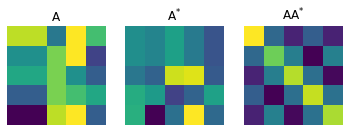

In [79]:
# pinv with repeated column in square matrix, and with non-square matrix
m = 5
A = np.random.randint(-5,6,(m,m))
A[:,0] = A[:,1]
print(A)

# A = np.random.randn(m,m+2)

# compute pseudo-inverse
Ainv = np.linalg.pinv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{*}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{*}$')

for i in ax:
    i.axis('off')

plt.show()

# Solving a system of equations

In [82]:
A = np.array([[2, 1, 2], [3, 2, 1], [0, 1, 1]])
B = np.array([8,3,4])
x = np.linalg.solve(A, B)
x

array([-0.2, -0.4,  4.4])

In [80]:
X = np.array([ [2,1,-1],[3,4,2],[1,-5,-2] ])
y = np.array([1,13,0])

b = np.linalg.inv(X.T@X) @ (X.T@y)
b

array([ 3., -1.,  4.])

In [81]:
b = np.linalg.solve(X,y)
b

array([ 3., -1.,  4.])

In [83]:
# visualize the three possible outcomes of simultaneous equations

# 1) one solution
X1 = np.array([ [3,-1],[-1,1] ])
y1 = np.array([6,2])

# 2) infinite solutions
X2 = np.array([ [3,-1],[1.5,-.5] ])
y2 = np.array([6,3])

# 3) no solutions
X3 = np.array([ [3,-1],[1.5,-.5] ])
y3 = np.array([6,2])

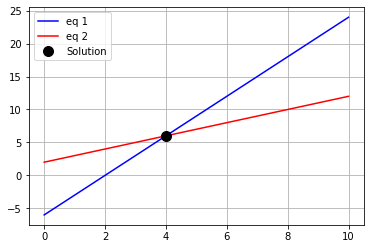

In [84]:
### generate the plot
xlim = np.array([0,10])

# 1) Case 1: one unique solution

# convert equations into y=mx+b form
yy1 = -X1[0,0]/X1[0,1]*xlim + y1[0]/X1[0,1]
yy2 = -X1[1,0]/X1[1,1]*xlim + y1[1]/X1[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r',label='eq 2')

# solve and plot
b1 = np.linalg.solve(X1,y1)
plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

LinAlgError: Singular matrix

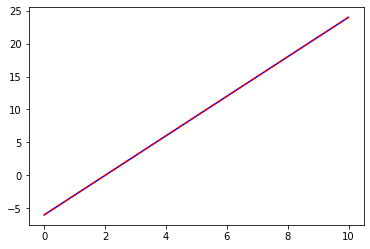

In [85]:
# Case 2: infinite solutions

# convert equations into y=mx+b form
yy1 = -X2[0,0]/X2[0,1]*xlim + y2[0]/X2[0,1]
yy2 = -X2[1,0]/X2[1,1]*xlim + y2[1]/X2[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r--',label='eq 2')

# solve and plot
b1 = np.linalg.solve(X2,y2)
plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

LinAlgError: Singular matrix

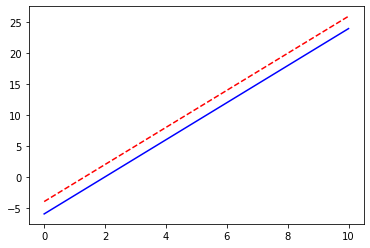

In [86]:
# Case 3: no solutions

# convert equations into y=mx+b form
yy1 = -X3[0,0]/X3[0,1]*xlim + y3[0]/X3[0,1]
yy2 = -X3[1,0]/X3[1,1]*xlim + y3[1]/X3[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r--',label='eq 2')

# solve and plot
b1 = np.linalg.solve(X3,y3)
plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

# Visualizing matrix-vector multiplication

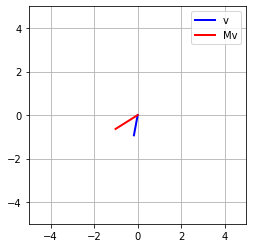

In [87]:
M = np.array([ [.5,1],
               [1,.5] ])

v = np.array([1,2])
v = np.random.randn(2)
# v = np.array([1,1])
# v = np.array([1,-1])

Mv = M@v

plt.plot([0,v[0]],[0,v[1]],'b',label='v',linewidth=2)
plt.plot([0,Mv[0]],[0,Mv[1]],'r',label='Mv',linewidth=2)

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.legend()
plt.grid()

plt.show()

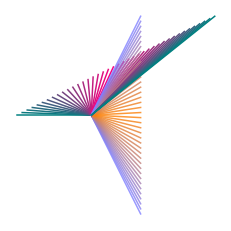

In [88]:
v1 = np.linspace(-2,2,40)

for i in v1:
    
    v = np.array([1,i])
    Mv = M@v
    plt.plot([0,v[0]],[0,v[1]],color=[1-abs(i)/4,.5,abs(i)/2],alpha=.8)
    plt.plot([0,Mv[0]],[0,Mv[1]],color=[1-abs(i)/2,abs(i)/4,.5])
    

plt.axis('square')
plt.axis('off')
plt.show()

# Eigenvalues and eigenvectors

In [115]:
# calculate the determinant
A= np.array([2,3,1,4]).reshape(2,2)
display(Math(sym.latex(sym.sympify(A))))
np.linalg.det(A)

<IPython.core.display.Math object>

5.000000000000001

In [116]:
# Computing gradient
a = np.array([1,3, 6, 7, 11, 14])
gr = np.gradient(a)
gr

array([2. , 2.5, 2. , 2.5, 3.5, 3. ])

In [90]:
A = np.array([[1,2,3],[4,5,6],[7,8,8]])

# eigenvalues and eigenvectors of this matrix
EW, EV = np.linalg.eig(A)

In [91]:
EW

array([15.55528261, -1.41940876, -0.13587385])

In [92]:
EV

array([[-0.24043423, -0.67468642,  0.51853459],
       [-0.54694322, -0.23391616, -0.78895962],
       [-0.80190056,  0.70005819,  0.32964312]])

[94.50456866  4.13692696 14.06042786 60.37705442 39.92102211]


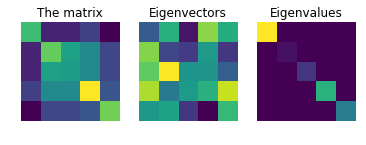

In [165]:
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)
print(eigvals)

# visualize the matrices
fig,ax = plt.subplots(1,3)

ax[0].imshow(M)
ax[0].set_title('The matrix')

ax[1].imshow(eigvecs)
ax[1].set_title('Eigenvectors')

ax[2].imshow(np.diag(eigvals))
ax[2].set_title('Eigenvalues')

for i in ax:
    i.axis('off')

plt.show()

In [166]:
Mv = M@eigvecs[:,0]
lv = eigvals[0] * eigvecs[:,0]

print(Mv)
print(lv)

[-29.12339181  51.06094009  41.53707056  60.71971609   7.96930309]
[-29.12339181  51.06094009  41.53707056  60.71971609   7.96930309]


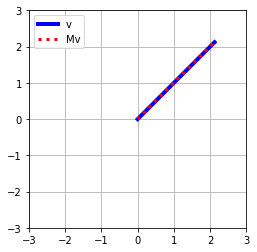

In [174]:
# part 1: 2x2 symmetric matrix. plot Mv and lv 

M = np.array([ [1,2],[2,1] ])
d,V = np.linalg.eig(M)

lv = d[0]*V[:,0] # change to 1 without changing d
Mv = M@V[:,0]

plt.plot([0,lv[0]],[0,lv[1]],'b',label='v',linewidth=4)
plt.plot([0,Mv[0]],[0,Mv[1]],'r:',label='Mv',linewidth=3)

plt.axis('square')
plt.axis([-3,3,-3,3])
plt.legend()
plt.grid()

plt.show()

In [167]:
# part 2: 6x6 symmetric matrix. compute all pairwise dot products of eigenvectors

# the matrix
m = 6
M = np.random.randn(m,m)
M = M@M.T

# its eigendecomposition
d,V = np.linalg.eig(M)

dps = np.zeros((m,m))

for i in range(0,m):
    for j in range(0,m):
        dps[i,j] = np.dot(V[:,i],V[:,j])
        
print(np.round(dps,2))

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]]


# LU decomposition of a matrix
Compute pivoted LU decomposition of a matrix where P is a permutation matrix, L lower triangular with unit diagonal elements, and U upper triangular.

In [131]:
from scipy import linalg
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
display(Math(sym.latex(sym.sympify(A))))

<IPython.core.display.Math object>

In [132]:
P, L, U = linalg.lu(A)

In [133]:
display(Math(sym.latex(sym.sympify(P))))

<IPython.core.display.Math object>

In [134]:
display(Math(sym.latex(sym.sympify(L))))

<IPython.core.display.Math object>

In [135]:
display(Math(sym.latex(sym.sympify(U))))

<IPython.core.display.Math object>

In [136]:
# Multiply L and U
np.dot(L,U)

array([[7., 8., 9.],
       [1., 2., 3.],
       [4., 5., 6.]])

In [137]:
# eigenvalues and eigenvectors of this matrix
EW, EV = linalg.eig(A)

In [138]:
display(Math(sym.latex(sym.sympify(EW))))

<IPython.core.display.Math object>

In [139]:
display(Math(sym.latex(sym.sympify(EV))))

<IPython.core.display.Math object>

# Singular value decomposition

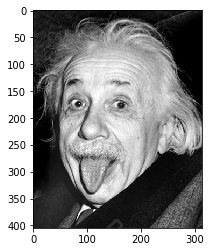

(405, 314, 3)
(405, 314)


In [176]:
# SVD of Einstein
from PIL import Image
ein = Image.open('einstein.jpg')

plt.imshow(ein)
plt.show()

# SVD is defined on 2D matrices
print( np.shape(ein) )
ein = np.mean(ein,2)
print( np.shape(ein) )

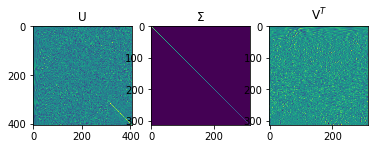

In [177]:
# Take the SVD
U,s,V = np.linalg.svd(ein)

# image the results
fig,ax = plt.subplots(1,3)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V$^T$')
plt.show()

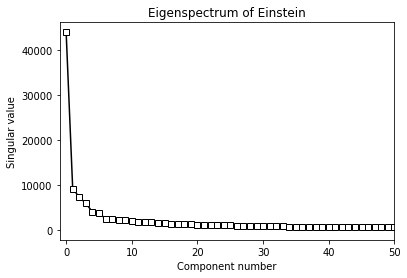

In [178]:
# plot the eigenspectrum

plt.plot(s,'ks-',markerfacecolor='w')
plt.xlim([-1,50])
plt.xlabel('Component number')
plt.ylabel('Singular value')
plt.title('Eigenspectrum of Einstein')
plt.show()

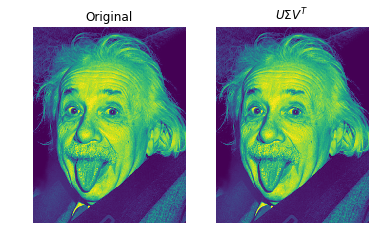

In [179]:
# reconstruct ein, then shuffle the singular values

# reconstruct S from s
S = np.zeros(np.shape(ein))
for i in range(0,len(s)):
    S[i,i] = s[i]

rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('$U\\Sigma V^T$')

plt.show()

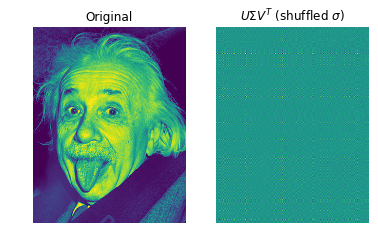

In [183]:
# reconstruct S from s
S = np.zeros(np.shape(ein))

randorder = np.random.permutation(len(s))

for i in range(0,len(s)):
    S[i,i] = s[randorder[i]]

# for i in range(5,len(s)): # 0-10 and 5-end
#     S[i,i] = s[i]
    
    
rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('$U\\Sigma V^T$ (shuffled $\\sigma$)')

plt.show()

In [2]:
# create a column vector
cv = np.array([ [-2], [3] ])

display(Math(sym.latex(sym.sympify(cv))))

<IPython.core.display.Math object>

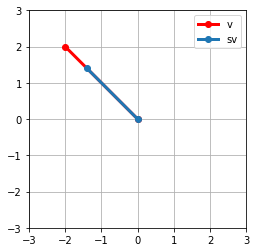

In [2]:
# visualize scalar-vector multiplication

v = np.array([-2,2])
s = .7

sv = s*v
plt.plot([0,v[0]],[0,v[1]],'ro-',linewidth=3,label='v')
plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='sv')
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [47]:
# algorithm to compute the dot product
v = np.random.randn(7)
w = np.random.randn(7)

dp1 = 0
for i in range(0,len(v)):
    dp1 += v[i]*w[i]

dp2 = np.dot(v,w)

print(str(dp1) + '\t' + str(dp2))

4.496205785840504	4.496205785840504


In [12]:
# number of data points
n = 10

# data
data1 = np.arange(0,n) + np.random.randn(n)
data2 = np.arange(0,n) + np.random.randn(n)

# mean-center
data1 -= np.mean(data1)
data2 -= np.mean(data2)

# compute correlation
numer = np.dot(data1,data2)
denom = np.sqrt( np.dot(data1,data1) ) * np.sqrt(np.dot(data2,data2))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(data1,data2)[1][0]

print(r1)
print(r2)

0.9038359551350148
0.903835955135015


In [26]:
# outer product computation
o1 = np.random.randint(0,10,7)
o2 = np.random.randint(0,10,4)

outermat = np.zeros((len(o1),len(o2)))

for i in range(len(o1)):
    outermat[i,:] = o1[i]*o2
    
print(outermat-np.outer(o1,o2))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [29]:
# matrix multiplication
A = np.random.randn(5,5)
I = np.eye(5)

print(A)
print(' ')
print(A@I)

[[ 1.41116507  0.11118908 -0.84036896  0.11313107  1.70270048]
 [-0.03428775 -1.04824032  1.01029019  0.05180005 -0.96271664]
 [ 0.09002964 -0.03697255 -0.76111096  0.13235124  0.6355435 ]
 [-0.99132593  0.08314975 -0.06567858  0.64614303 -0.57610782]
 [ 0.20196848 -2.21321209  2.28529331  0.59870048 -0.65780559]]
 
[[ 1.41116507  0.11118908 -0.84036896  0.11313107  1.70270048]
 [-0.03428775 -1.04824032  1.01029019  0.05180005 -0.96271664]
 [ 0.09002964 -0.03697255 -0.76111096  0.13235124  0.6355435 ]
 [-0.99132593  0.08314975 -0.06567858  0.64614303 -0.57610782]
 [ 0.20196848 -2.21321209  2.28529331  0.59870048 -0.65780559]]


In [31]:
# matrix multiplication
A = np.random.randn(8,5)
I = np.eye(8)

I@A

array([[-0.10474819,  0.9019924 ,  0.91857271, -0.34820598, -1.85856762],
       [-1.24367987,  0.27385517,  0.97527506, -0.33152848, -1.27207881],
       [-0.04609427,  1.18712626, -0.5844609 ,  0.41414651,  0.67234351],
       [ 0.03110833, -1.29788706, -0.5543878 ,  1.09507752, -1.28611552],
       [-0.41642328,  0.13876337,  1.58639187, -0.00974641, -1.21843364],
       [-1.99781285,  1.1557947 , -0.77074796, -0.34969327,  0.01284731],
       [-1.02710798,  0.75087018, -0.03063462, -0.48408204, -0.55336977],
       [ 1.10811051, -0.89907204,  0.74964954,  0.21866847,  0.50128612]])

In [33]:
# random matrices are invertible
A = np.random.randint(-5,6,(5,5))
Ainv = np.linalg.inv(A)

np.round(A@Ainv,4)

array([[ 1.,  0., -0., -0., -0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -0.,  0.],
       [ 0., -0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  0.,  1.]])

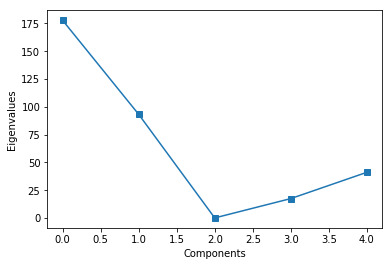

In [37]:
# plot the eigenspectrum
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)

plt.plot(np.matrix.flatten(eigvals),'s-')
plt.xlabel('Components')
plt.ylabel('Eigenvalues')

plt.show()

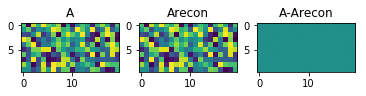

In [40]:
# Reconstruct a matrix based on its SVD
A = np.random.randint(-10,11,(10,20))

U,s,V = np.linalg.svd(A)

# reconstruct S
# S = np.diag(s)
S = np.zeros(np.shape(A))
for i in range(len(s)):
    S[i,i] = s[i]

Arecon = U@S@V

fig,ax = plt.subplots(1,3)

ax[0].imshow(A,vmin=-10,vmax=10)
ax[0].set_title('A')

ax[1].imshow(Arecon,vmin=-10,vmax=10)
ax[1].set_title('Arecon')

ax[2].imshow(A-Arecon,vmin=-10,vmax=10)
ax[2].set_title('A-Arecon')

plt.show()